In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/Pair Trading final/data/Nifty_50_close.csv')
stock_names = data.columns[1:]
data

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-03,83.153633,134.706543,439.091125,259.076141,251.916626,1036.131714,63.653694,45.593979,60.885281,...,240.419800,222.953842,446.352051,92.316086,245.710632,47.525696,139.034042,172.213837,1034.288086,159.698929
1,2011-01-04,83.358696,137.957016,435.507385,255.619690,248.287949,1003.359985,63.260792,45.380741,60.294853,...,233.050705,224.143417,441.225677,93.640793,243.823334,46.894550,145.471405,170.863922,1036.665527,160.227905
2,2011-01-05,83.576599,146.361649,430.650635,259.612366,241.463486,964.553528,62.998871,45.046360,58.357433,...,229.438522,223.297012,446.698883,92.978455,240.893860,45.966370,142.335739,170.083847,1019.882263,160.558502
3,2011-01-06,82.596054,143.900589,427.349915,256.818451,240.533295,931.816956,62.208553,44.052860,57.084274,...,223.406967,228.764465,451.613007,91.902100,236.800064,46.125011,142.589737,167.194855,961.211853,160.789902
4,2011-01-07,80.506813,136.749664,432.772583,250.171555,235.891541,923.922119,59.580208,43.214451,56.918213,...,221.579605,225.721909,440.416199,89.666672,223.504745,44.636559,138.262314,159.387207,939.246277,157.682205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,2023-12-22,2808.350098,1027.500000,5536.405762,3341.300049,1088.300049,6372.100098,7295.299805,1672.050049,446.649994,...,626.248047,1236.600830,3778.896729,985.917603,724.700012,133.550003,1275.150024,3627.350098,9969.000000,461.665405
3200,2023-12-26,2865.449951,1028.750000,5628.072754,3383.350098,1094.250000,6464.549805,7162.299805,1645.300049,451.600006,...,627.526550,1240.428955,3750.782227,1000.366699,719.549988,135.199997,1282.000000,3656.699951,10018.650391,469.099579
3201,2023-12-27,2843.350098,1024.400024,5682.324219,3404.449951,1106.349976,6709.649902,7232.799805,1669.449951,454.700012,...,637.853394,1245.350830,3766.247559,1019.632263,740.900024,137.199997,1280.150024,3689.250000,10436.099609,469.947784
3202,2023-12-28,2809.899902,1016.950012,5755.308105,3397.250000,1107.849976,6703.299805,7258.649902,1681.199951,465.799988,...,640.656433,1254.995972,3755.080811,1033.783447,753.900024,138.149994,1285.949951,3715.100098,10426.299805,468.450958


In [3]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [4]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [5]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2023-12-22,0,0,0,0,0,0,-1,0,0,...,-1,0,0,0,0,0,0,0,0,1
3186,2023-12-26,0,0,1,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0
3187,2023-12-27,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3188,2023-12-28,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [6]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [7]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-21,50.464134,42.548163,60.388117,27.809632,44.667616,38.917275,28.740460,29.781734,30.865296,...,42.598853,50.574782,65.291971,39.558000,34.726813,23.053031,42.965012,46.456953,41.843280,34.667113
1,2011-01-24,50.281884,48.264506,78.495844,23.610726,53.277395,37.950380,37.546011,28.752792,38.823405,...,52.931649,50.044359,64.341232,42.813995,35.057707,40.713885,46.381510,51.885867,39.956818,29.018157
2,2011-01-25,43.605094,43.876511,63.702442,21.848926,47.415800,35.854319,30.589172,30.308570,54.952767,...,51.202314,41.427199,56.830146,42.608043,30.880447,44.928813,44.547700,54.202835,42.352690,31.989488
3,2011-01-27,40.738504,40.134098,60.100212,21.908541,47.794956,34.557838,28.015269,26.312249,57.296232,...,48.749863,34.363114,59.967143,43.486444,41.012423,42.151256,36.748035,51.243471,36.938164,29.231777
4,2011-01-28,30.773028,43.629190,54.186547,20.176278,39.773987,30.824893,23.631982,25.885412,55.017968,...,45.545366,28.885458,54.027875,25.285880,33.050769,36.324182,29.813610,43.509477,35.097962,28.782867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2023-12-22,59.467520,63.632316,56.310464,70.553523,51.809801,66.262499,45.602616,50.238204,67.834805,...,64.843211,61.883238,68.619666,75.671708,61.192390,59.730993,61.598036,66.155018,71.435202,74.695608
3186,2023-12-26,62.494891,63.823187,60.604218,74.379120,53.701776,69.269393,40.454556,43.589525,70.086889,...,65.348177,63.195808,64.933236,79.142150,58.101485,62.870054,62.944244,68.655622,72.491070,76.752588
3187,2023-12-27,60.608065,62.592054,62.926458,76.059822,57.367451,75.503016,44.059529,50.020403,71.435736,...,69.196753,64.870768,66.014820,82.688175,65.811313,66.299310,62.308956,71.197267,79.389289,76.982492
3188,2023-12-28,57.765253,60.441663,65.843427,74.269456,57.813370,75.078099,45.365632,52.837578,75.666756,...,70.165345,67.949066,64.468622,84.740342,69.492456,67.819658,63.551012,73.065211,78.889163,75.562351


In [8]:
prices = pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/Pair Trading final/data/Nifty_50_close.csv')
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-21,81.538620,130.016678,450.455017,240.054657,237.070389,921.606445,56.843491,41.164463,54.514904,...,221.234573,222.061661,467.011200,87.472610,222.978928,42.496700,134.892212,163.782654,973.716125,150.739532
1,2011-01-24,81.487343,132.106247,484.641113,236.219772,244.198822,917.431091,57.945408,40.970615,55.465157,...,229.596161,221.787140,466.066864,87.969368,223.147934,43.826523,135.917892,166.711365,967.772949,146.755707
2,2011-01-25,79.468582,130.155991,468.514679,234.318024,238.939987,908.308167,56.062214,41.086922,58.209824,...,228.139374,216.731445,458.107758,87.927979,218.960266,44.238293,135.263382,168.068314,972.860352,147.747543
3,2011-01-27,78.475227,128.298584,463.752258,234.336090,239.262344,902.554016,55.195133,40.335747,58.740299,...,226.056442,211.126770,463.068695,88.052162,224.565750,43.883900,132.000778,166.557220,955.506470,145.671936
4,2011-01-28,73.931427,129.552322,455.217468,232.447922,230.890564,884.659424,53.420330,40.248516,58.348206,...,223.215286,205.339005,456.099854,82.629097,216.011993,43.029980,127.976158,161.988968,948.897766,145.323242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2023-12-22,2808.350098,1027.500000,5536.405762,3341.300049,1088.300049,6372.100098,7295.299805,1672.050049,446.649994,...,626.248047,1236.600830,3778.896729,985.917603,724.700012,133.550003,1275.150024,3627.350098,9969.000000,461.665405
3186,2023-12-26,2865.449951,1028.750000,5628.072754,3383.350098,1094.250000,6464.549805,7162.299805,1645.300049,451.600006,...,627.526550,1240.428955,3750.782227,1000.366699,719.549988,135.199997,1282.000000,3656.699951,10018.650391,469.099579
3187,2023-12-27,2843.350098,1024.400024,5682.324219,3404.449951,1106.349976,6709.649902,7232.799805,1669.449951,454.700012,...,637.853394,1245.350830,3766.247559,1019.632263,740.900024,137.199997,1280.150024,3689.250000,10436.099609,469.947784
3188,2023-12-28,2809.899902,1016.950012,5755.308105,3397.250000,1107.849976,6703.299805,7258.649902,1681.199951,465.799988,...,640.656433,1254.995972,3755.080811,1033.783447,753.900024,138.149994,1285.949951,3715.100098,10426.299805,468.450958


In [9]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

    

In [10]:
returns,intrade = get_returns(master_macd, master_rsi, prices)

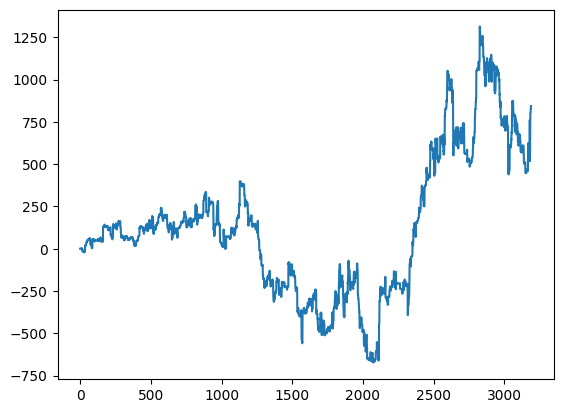

In [11]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.show()

In [12]:
def get_returns1(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_rsi.iloc[i,j]<30):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_rsi.iloc[i,j]>70):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

In [13]:
returns1,intrade1 = get_returns1(master_macd, master_rsi, prices)

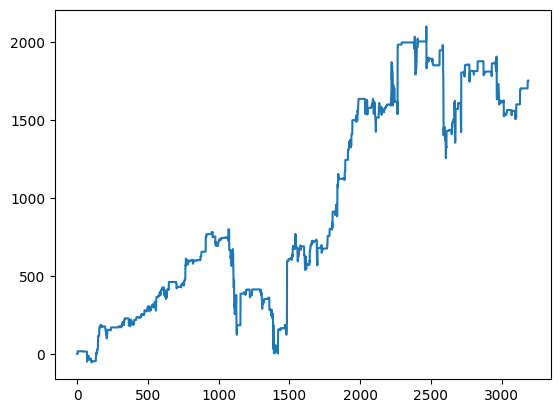

In [14]:
cumulative_returns = np.cumsum(returns1)
plt.plot(cumulative_returns)
plt.show()